# Set up atmospheric forcing from CESM2 experiment output

Variables available etc.: https://docs.google.com/spreadsheets/u/1/d/1OPcJsTcpaxBVZqcRpEEf16cipuL3CUk2nWojQ_ulRjE/edit?gid=0#gid=0

In [108]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import cmocean
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.file_io import find_cesm2_file
from nemo_python_git.forcing import cesm2_expt_all_atm_forcing, cesm2_expt_all_ocn_forcing

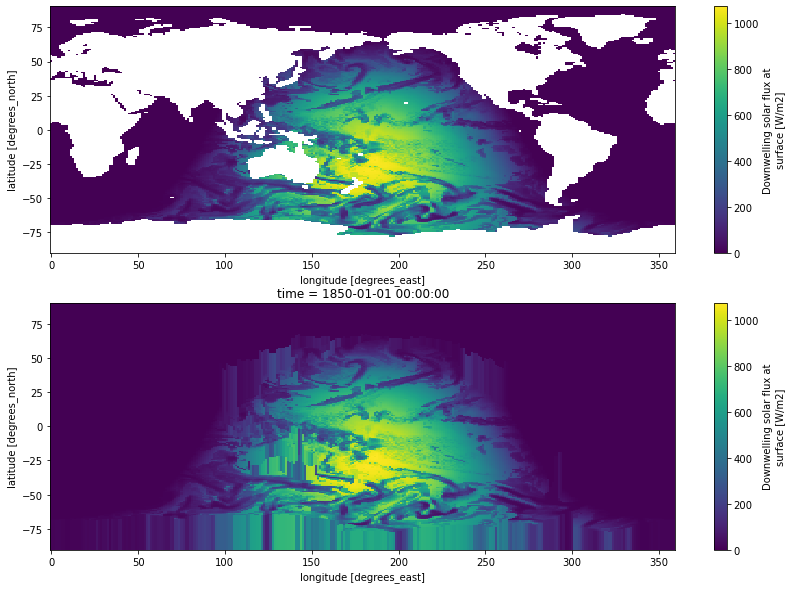

In [96]:
var = 'FSDS'
folder = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/LE2/'
ds_proc   = xr.open_dataset(f'{folder}processed/CESM2-LE2_ens1011.001_{var}_y1850.nc')
orig_file = xr.open_dataset(f'{folder}b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h1.{var}.18500101-18591231.nc')

fig, ax = plt.subplots(2,1,figsize=(14,10))
orig_file[var].isel(time=0).where(CESM2_mask.isel(time=0) == 0).plot(ax=ax[0])
ds_proc[var].isel(time=0).plot(ax=ax[1])

In [97]:
ds1 = xr.open_dataset(f'/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/CESM2_test1/files_test2/eANT025.L121_1m_18500101_18501231_SBC.nc')
ds2 = xr.open_dataset(f'/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/CESM2_test1/files_test5/eANT025.L121_1m_18500101_18501231_SBC.nc')

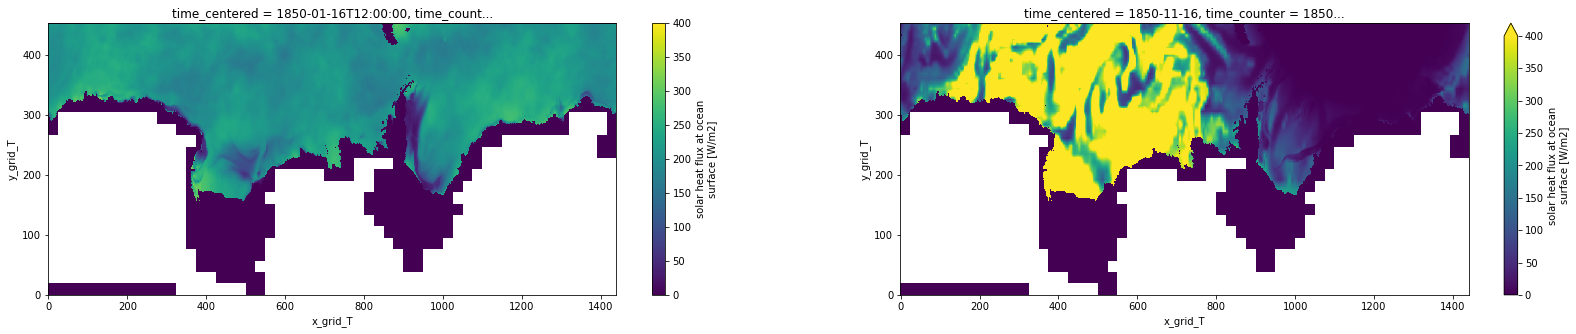

In [102]:
fig, ax = plt.subplots(1,2, figsize=(28,5))
ds1.isel(time_counter=0).qsr_oce.plot(ax=ax[0], vmin=0, vmax=400)
ds2.isel(time_counter=10).qsr_oce.plot(ax=ax[1], vmin=0, vmax=400)

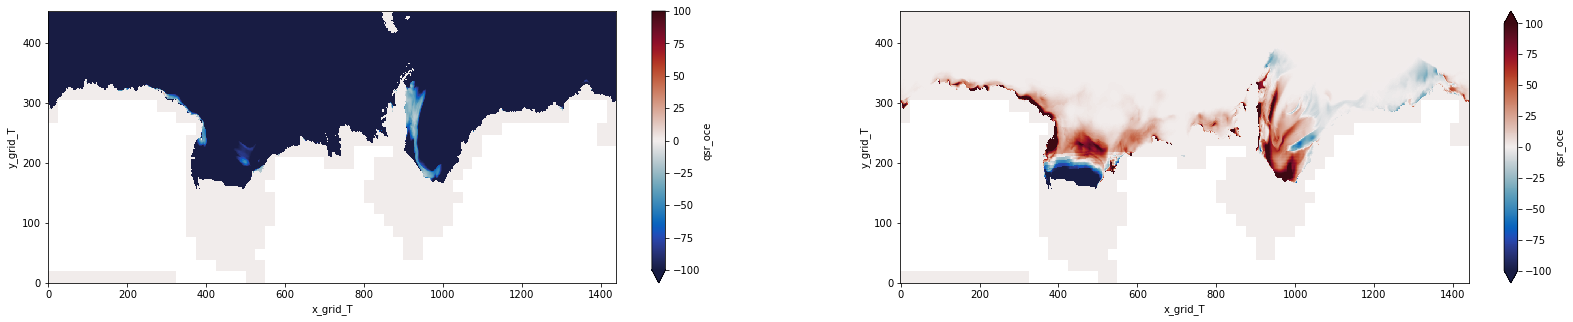

In [111]:
fig, ax = plt.subplots(1,2, figsize=(28,5))
(ds1.qsr_oce.isel(time_counter=3) - ds1.qsr_oce.isel(time_counter=0)).plot(ax=ax[0], vmin=-100, vmax=100, cmap=cmocean.cm.balance)
(ds2.qsr_oce.isel(time_counter=3) - ds2.qsr_oce.isel(time_counter=0)).plot(ax=ax[1], vmin=-100, vmax=100, cmap=cmocean.cm.balance)

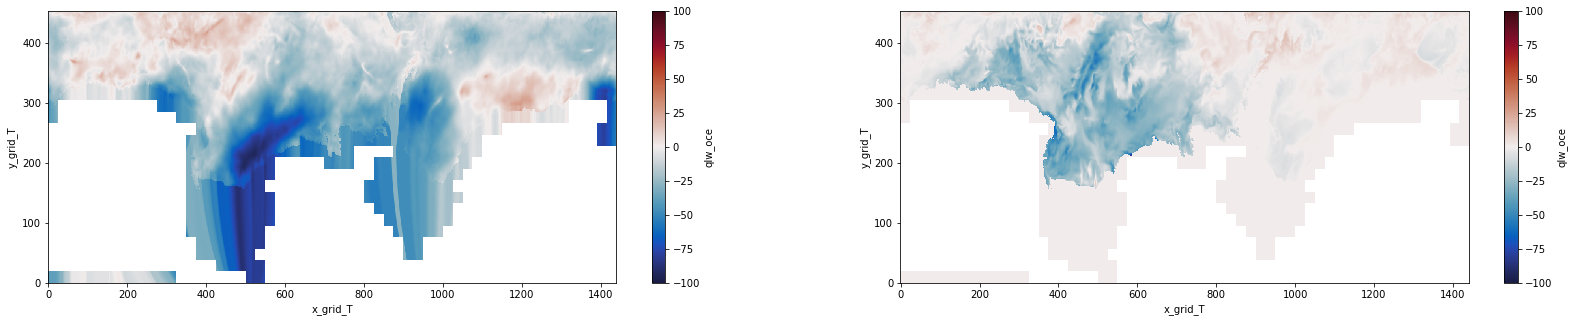

In [121]:
fig, ax = plt.subplots(1,2, figsize=(28,5))
(ds1.qlw_oce.isel(time_counter=3) - ds1.qlw_oce.isel(time_counter=0)).plot(ax=ax[0], vmin=-100, vmax=100, cmap=cmocean.cm.balance)
(ds2.qlw_oce.isel(time_counter=3) - ds2.qlw_oce.isel(time_counter=0)).plot(ax=ax[1], vmin=-100, vmax=100, cmap=cmocean.cm.balance)

In [126]:
for month in range(1,13):
    print(month)
    rads     = ds_proc[var].where(CESM2_mask.isel(time=0) == 0)
    rads_jan = rads.isel(time=(rads.time.dt.year==1850)*(rads.time.dt.month==month)).mean(dim='time')
    rads_jan = rads_jan.interpolate_na(dim='lat', method='nearest', fill_value="extrapolate")

    rads_jan.to_netcdf(f'/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/fsds_test_y1850m{month:02}.nc')

1
2
3
4
5
6
7
8
9
10
11
12


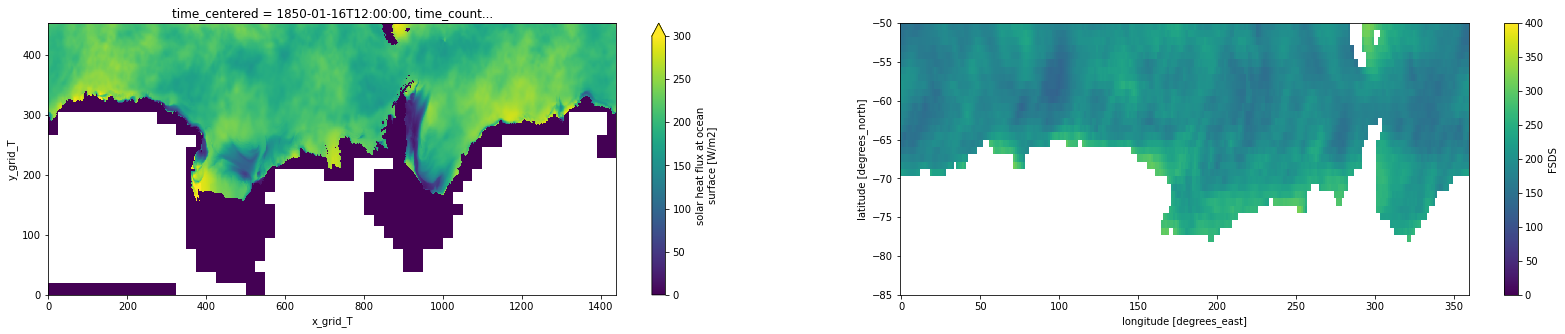

In [114]:
fig, ax = plt.subplots(1,2, figsize=(28,5))
ds1.isel(time_counter=0).qsr_oce.plot(ax=ax[0], vmin=0, vmax=300)
rads_jan.plot(ax=ax[1], vmin=0, vmax=400, ylim=(-85,-50))

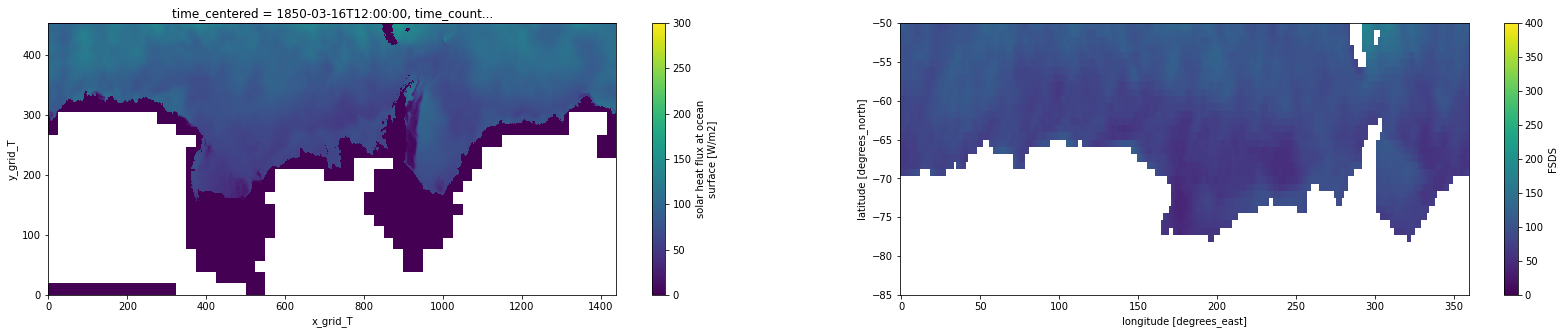

In [117]:
fig, ax = plt.subplots(1,2, figsize=(28,5))
ds1.isel(time_counter=2).qsr_oce.plot(ax=ax[0], vmin=0, vmax=300)
rads_jan.plot(ax=ax[1], vmin=0, vmax=400, ylim=(-85,-50))

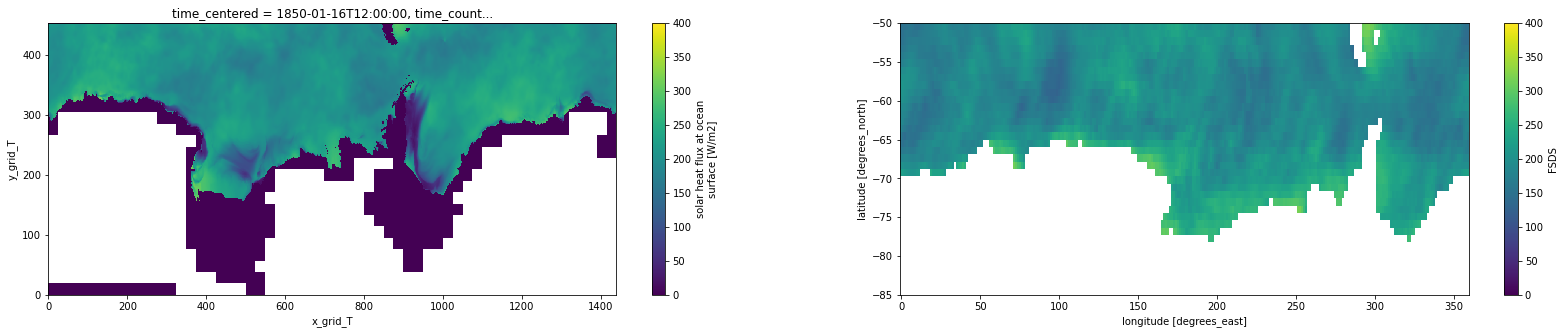

In [69]:
fig, ax = plt.subplots(1,2, figsize=(28,5))
ds1.isel(time_counter=0).qsr_oce.plot(ax=ax[0], vmin=0, vmax=400)
rads_jan.plot(ax=ax[1], vmin=0, vmax=400, ylim=(-85,-50))

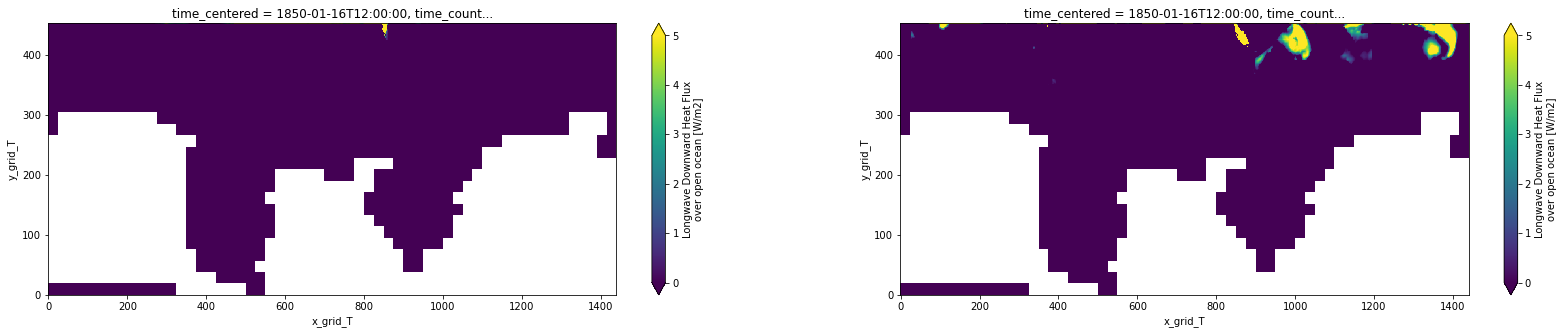

In [50]:
fig, ax = plt.subplots(1,2, figsize=(28,5))
ds1.isel(time_counter=0).qlw_oce.plot(ax=ax[0], vmin=0, vmax=5)
ds2.isel(time_counter=0).qlw_oce.plot(ax=ax[1], vmin=0, vmax=5)

#### create atmospheric forcing files

In [2]:
out_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/LE2/processed/'
cesm2_expt_all_atm_forcing('LE2', ens_strs=['1011.001'], out_dir=out_dir, start_year=1850, end_year=1860)

Processing ensemble member 1011.001
Processing UBOT
Processing VBOT
Processing FSDS
Processing FLDS
Processing TREFHT
Processing QREFHT
Processing PRECT
Processing PSL
Processing PRECS


In [ ]:
out_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/LE2/processed/'
cesm2_expt_all_ocn_forcing('LE2', ens_strs=['1011.001'], out_dir=out_dir, start_year=1850, end_year=1850)

Processing ensemble member 1011.001
Processing TEMP


/home/users/birgal/.conda/envs/jaspy3.10/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in ct_from_pt
  result_data = func(*input_data)


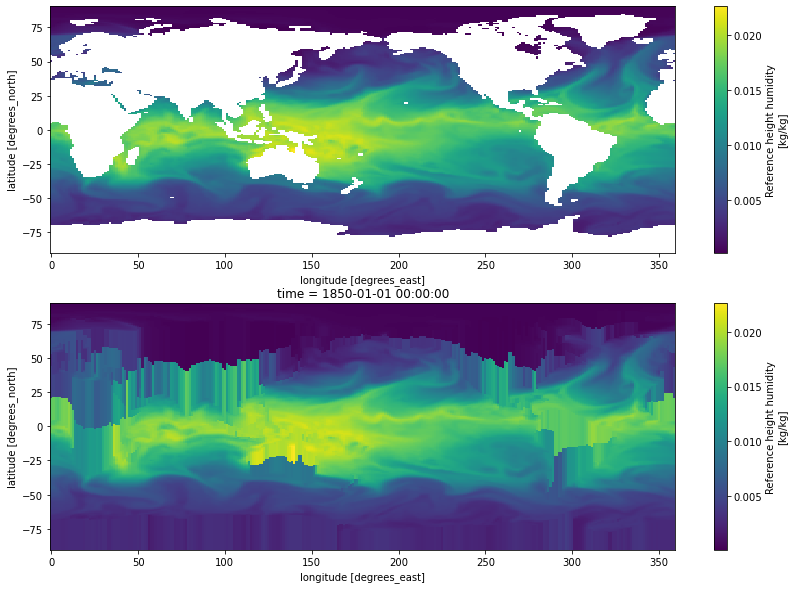

In [36]:
var = 'QREFHT'
folder = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/LE2/'
ds_proc   = xr.open_dataset(f'{out_dir}CESM2-LE2_ens1011.001_{var}_y1850.nc')
orig_file = xr.open_dataset(f'{folder}b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h1.{var}.18500101-18591231.nc')

fig, ax = plt.subplots(2,1,figsize=(14,10))
orig_file[var].isel(time=0).where(CESM2_mask.isel(time=0) == 0).plot(ax=ax[0])
ds_proc[var].isel(time=0).plot(ax=ax[1])

#### Look at radiation distribution

In [6]:
base_folder = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

In [7]:
CESM2_mask = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h0.LANDFRAC.185001-185912.nc').LANDFRAC
ERA5_mask  = xr.open_dataset(f'{base_folder}ERA5-forcing/ERA5-landmask.nc').isel(time=0)

In [4]:
def plot_radiation_distr(ds, var, xlim=(0,1000), ylim=(None,None), nbins=15):
    fig, ax = plt.subplots(3,4, figsize=(20,13))
    for n, axis in enumerate(ax.ravel()):
        print(n)
        xr.plot.hist(ds[var].isel(time=(ds.time.dt.month==n+1)), bins=nbins, xlim=xlim, ylim=ylim, ax=axis)
        axis.set_title(f'Month: {n+1}')

        if n < 8: axis.set_xlabel('')

    return fig, ax

0
1
2
3
4
5
6
7
8
9
10
11


Text(0.5, 0.98, 'ERA5 hourly shortwave radiation forcing 1850')

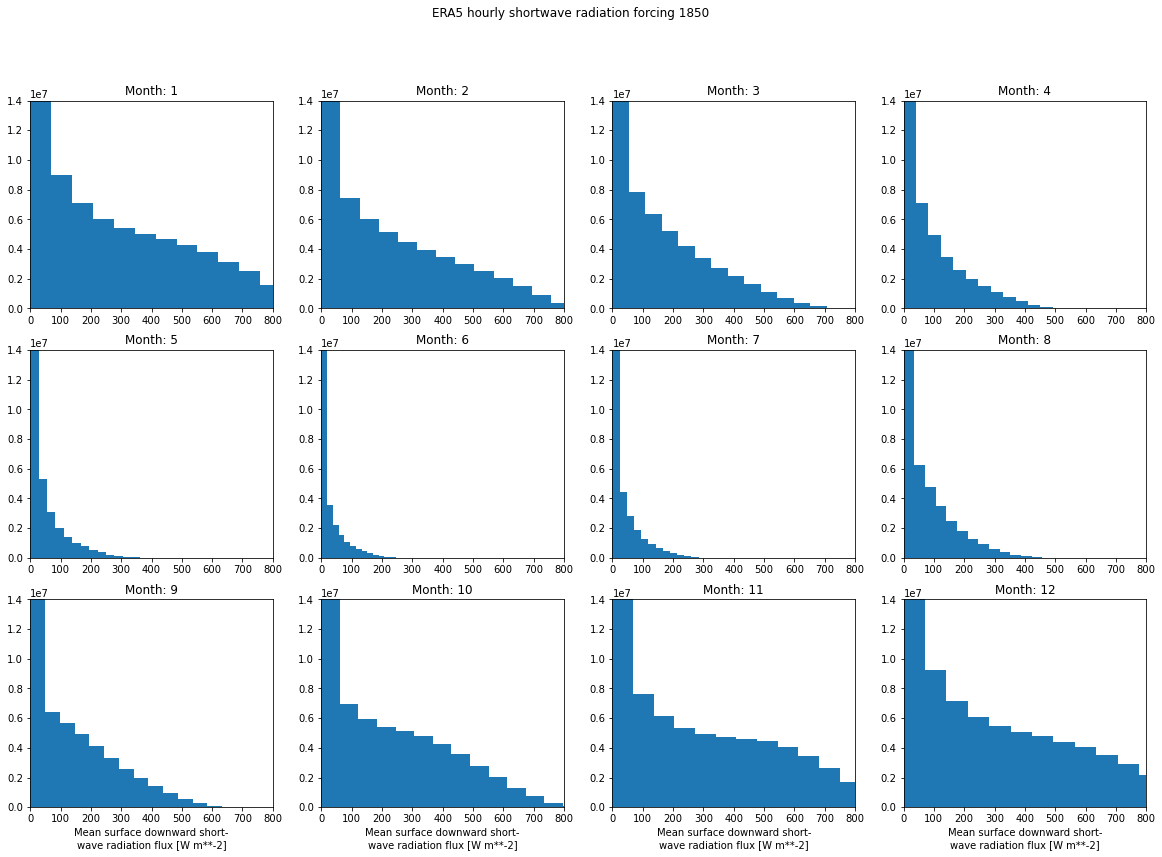

In [5]:
var_ERA5  = 'msdwswrf'
ds_ERA5   = xr.open_mfdataset(glob.glob(f'{base_folder}ERA5-forcing/drowned_1h/{var_ERA5}_y1979m*'), chunks='auto')
ds_ERA5_masked = ds_ERA5.where(ERA5_mask.lsm == 0)

fig, ax = plot_radiation_distr(ds_ERA5_masked.sel(latitude=slice(-50,-90)), var_ERA5, xlim=(0,800), ylim=(0,1.4e7))
fig.suptitle('ERA5 hourly shortwave radiation forcing 1850')

0
1
2
3
4
5
6
7
8
9
10
11


Text(0.5, 0.98, 'ERA5 hourly longwave radiation forcing 1850')

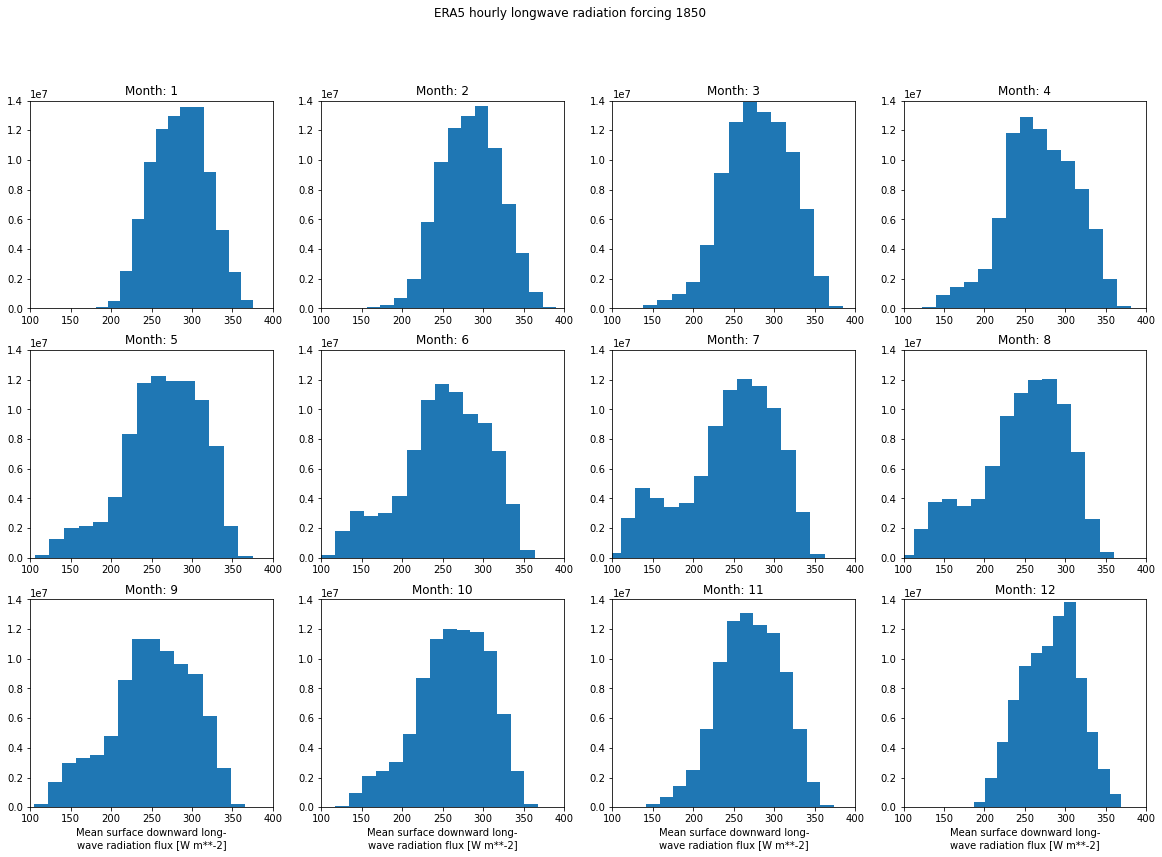

In [8]:
var_ERA5  = 'msdwlwrf'
ds_ERA5   = xr.open_mfdataset(glob.glob(f'{base_folder}ERA5-forcing/drowned_1h/{var_ERA5}_y1979m*'), chunks='auto')
ds_ERA5_masked = ds_ERA5.where(ERA5_mask.lsm == 0)

fig, ax = plot_radiation_distr(ds_ERA5_masked.sel(latitude=slice(-50,-90)), var_ERA5, xlim=(100,400), ylim=(0,1.4e7))
fig.suptitle('ERA5 hourly longwave radiation forcing 1850')

0
1
2
3
4
5
6
7
8
9
10
11


Text(0.5, 0.98, 'ERA5 daily shortwave radiation forcing 1850')

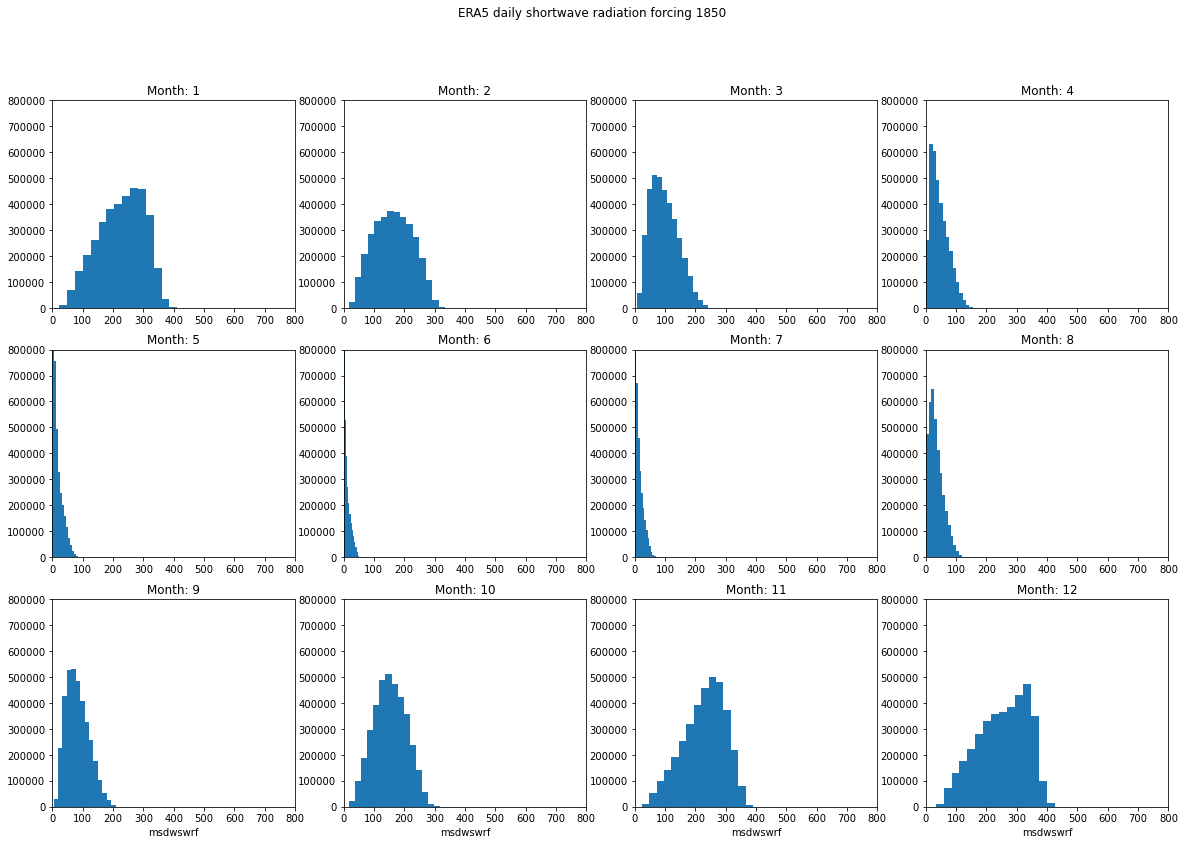

In [5]:
var_ERA5  = 'msdwswrf'
ds_ERA5   = xr.open_mfdataset(glob.glob(f'{base_folder}ERA5-forcing/drowned_1h/{var_ERA5}_y1979m*'), chunks='auto')
ds_ERA5_masked = ds_ERA5.resample(time='24H').mean().where(ERA5_mask.lsm == 0)

fig, ax = plot_radiation_distr(ds_ERA5_masked.sel(latitude=slice(-50,-90)), var_ERA5, xlim=(0,800), ylim=(0,6e5))
fig.suptitle('ERA5 daily shortwave radiation forcing 1850')

0
1
2
3
4
5
6
7
8
9
10
11


Text(0.5, 0.98, 'ERA5 hourly longwave radiation forcing 1850')

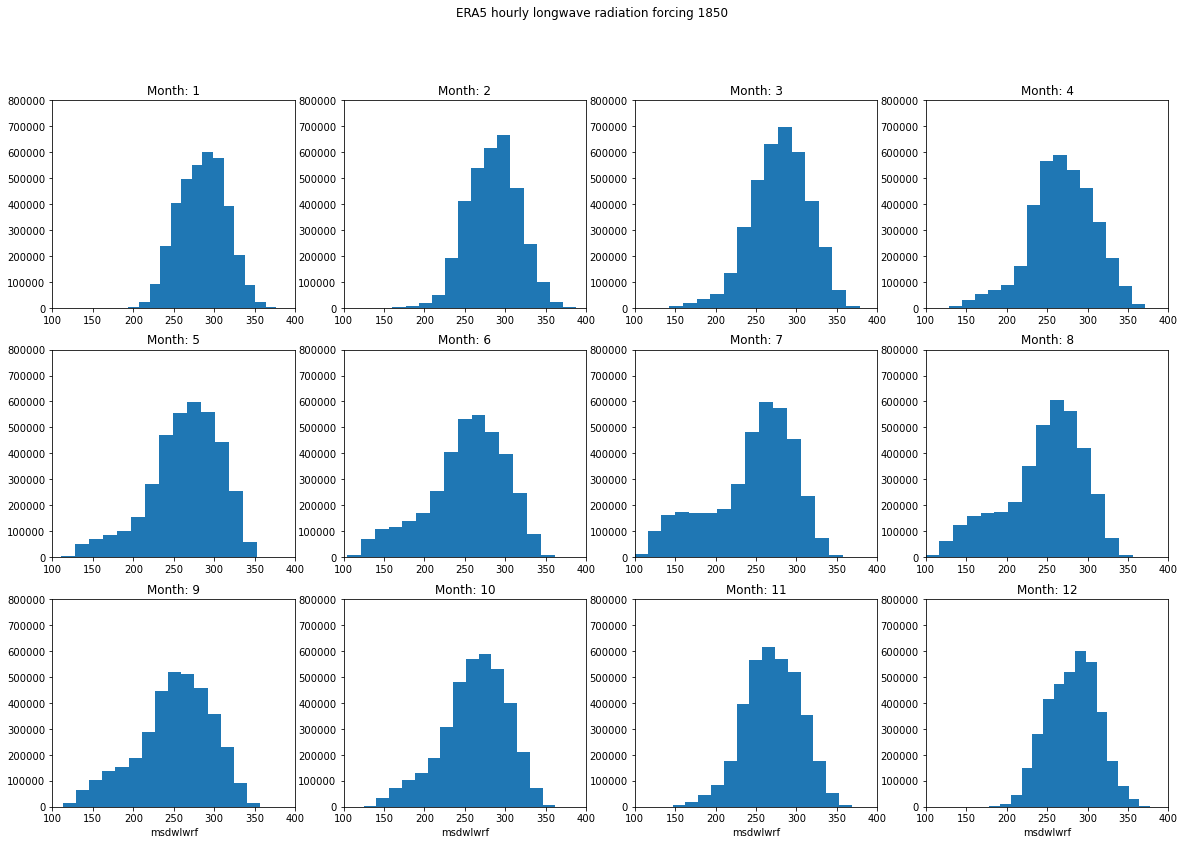

In [5]:
var_ERA5  = 'msdwlwrf'
ds_ERA5   = xr.open_mfdataset(glob.glob(f'{base_folder}ERA5-forcing/drowned_1h/{var_ERA5}_y1979m*'), chunks='auto')
ds_ERA5_masked = ds_ERA5.resample(time='24H').mean().where(ERA5_mask.lsm == 0)

fig, ax = plot_radiation_distr(ds_ERA5_masked.sel(latitude=slice(-50,-90)), var_ERA5, xlim=(100,400), ylim=(0,8e5))
fig.suptitle('ERA5 daily longwave radiation forcing 1850')

0
1
2
3
4
5
6
7
8
9
10
11


Text(0.5, 0.98, 'CESM2 daily shortwave radiation forcing 1850')

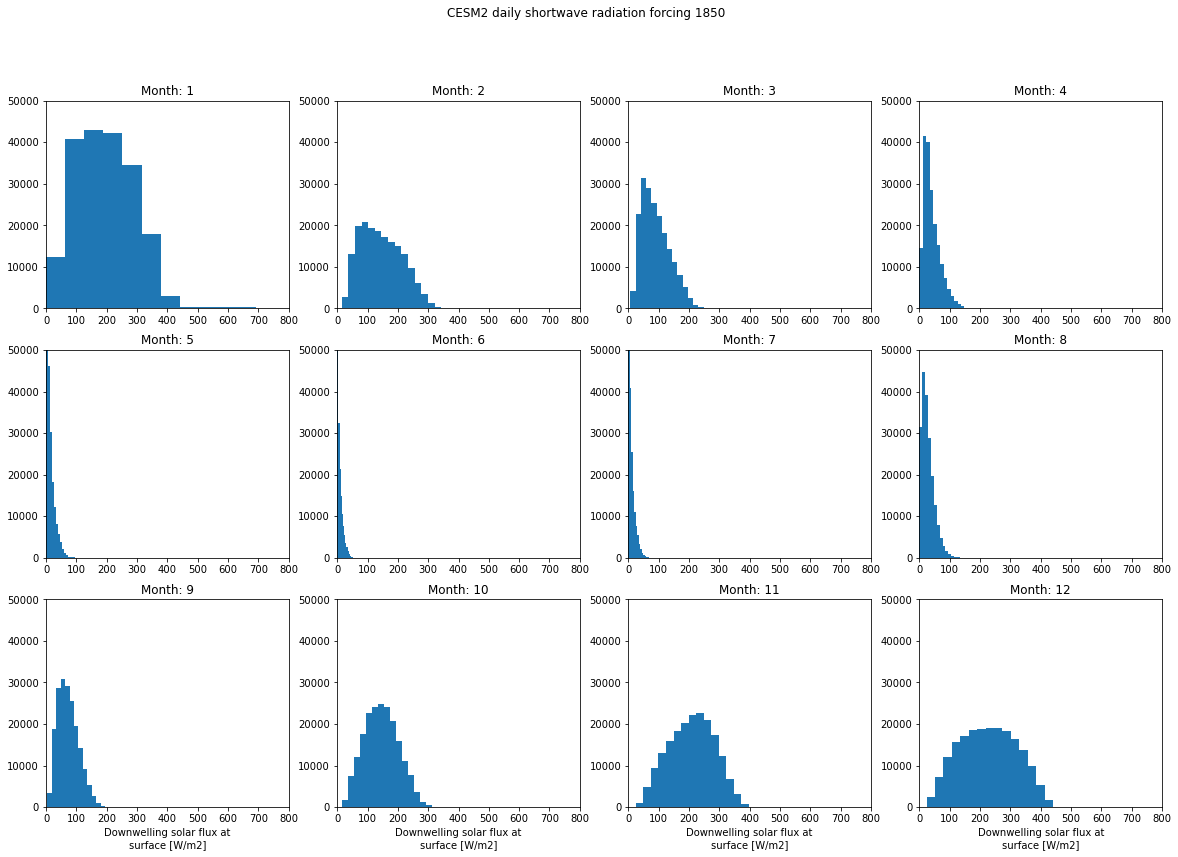

In [12]:
var_CESM2 = 'FSDS'
ds_CESM2   = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/processed/CESM2-LE2_ens1011.001_{var_CESM2}_y1850.nc')
CESM2_mask = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h0.LANDFRAC.185001-185912.nc').LANDFRAC
ds_CESM2_masked = ds_CESM2.where(CESM2_mask.isel(time=0) == 0)

fig, ax = plot_radiation_distr(ds_CESM2_masked.sel(lat=slice(-90,-50)), var_CESM2, xlim=(0,800), ylim=(0,50000))
fig.suptitle('CESM2 daily shortwave radiation forcing 1850')

0
1
2
3
4
5
6
7
8
9
10
11


Text(0.5, 0.98, 'CESM2 daily longwave radiation forcing 1850')

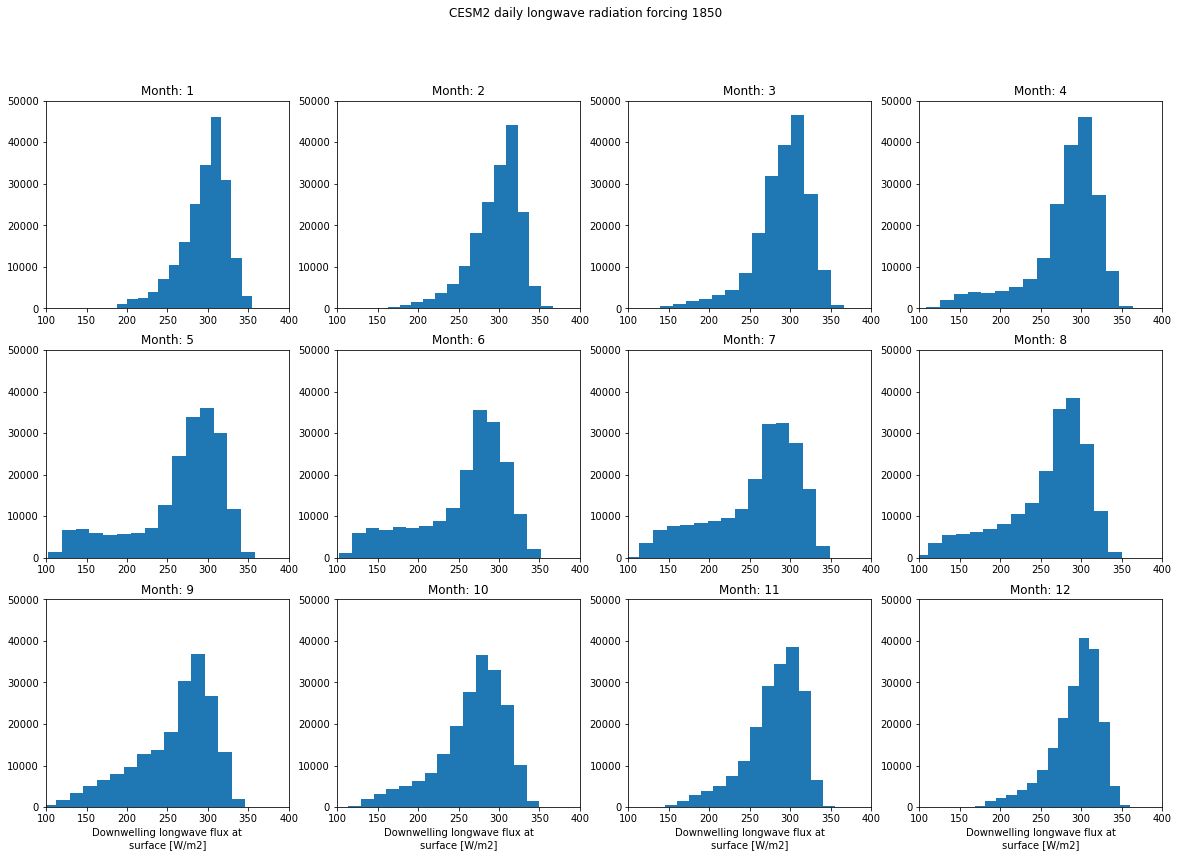

In [9]:
var_CESM2 = 'FLDS'
ds_CESM2   = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/processed/CESM2-LE2_ens1011.001_{var_CESM2}_y1850.nc')
CESM2_mask = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h0.LANDFRAC.185001-185912.nc').LANDFRAC
ds_CESM2_masked = ds_CESM2.where(CESM2_mask.isel(time=0) == 0)

fig, ax = plot_radiation_distr(ds_CESM2_masked.sel(lat=slice(-90,-50)), var_CESM2, xlim=(100,400), ylim=(0,50000))
fig.suptitle('CESM2 daily longwave radiation forcing 1850')

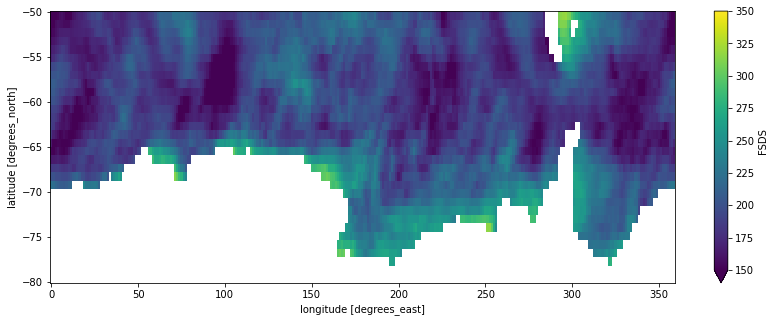

In [43]:
ds_new_masked.isel(time=slice(0,31)).mean(dim='time').sel(lat=slice(-80,-50)).plot(figsize=(14,5), vmin=150, vmax=350)

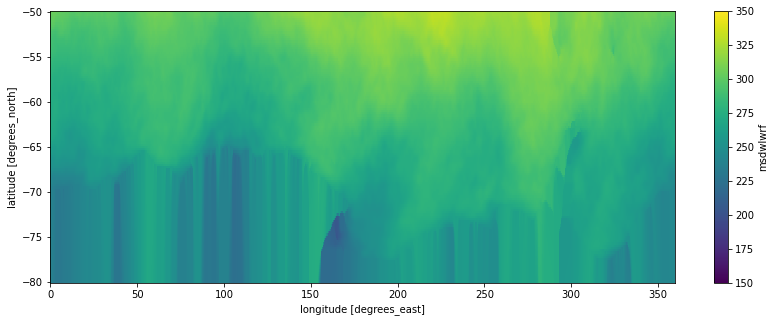

In [21]:
ds_old.isel(time=slice(0,24*31)).sel(latitude=slice(-50,-80)).mean(dim='time').plot(figsize=(14,5), vmin=150, vmax=350)

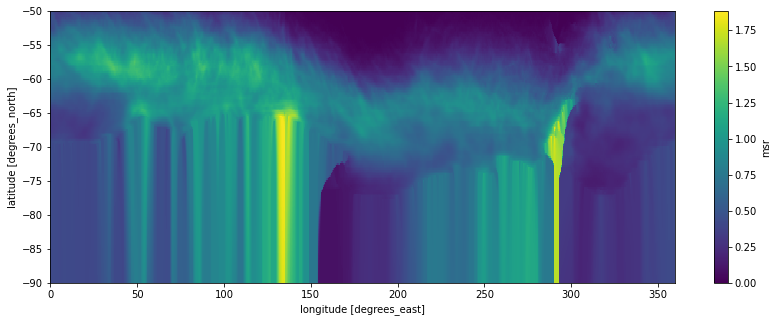

In [24]:
(ds_old.msr.sum(dim='time')*1e-3*3600*(8760/2208)).plot(figsize=(14,5), ylim=(-90, -50))

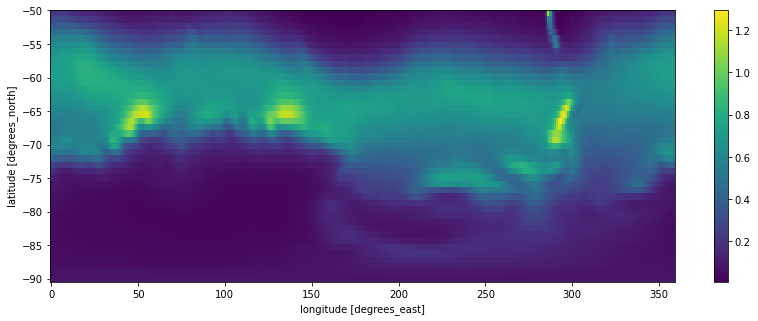

In [23]:
((ds3.PRECSC + ds4.PRECSL).sum(dim='time')*3600*24/10).plot(figsize=(14,5))

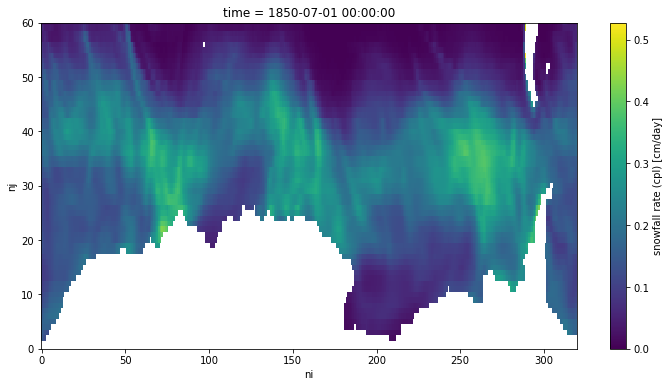

In [12]:
ds.snow.isel(time=5).plot(figsize=(12,6), ylim=(0,60))

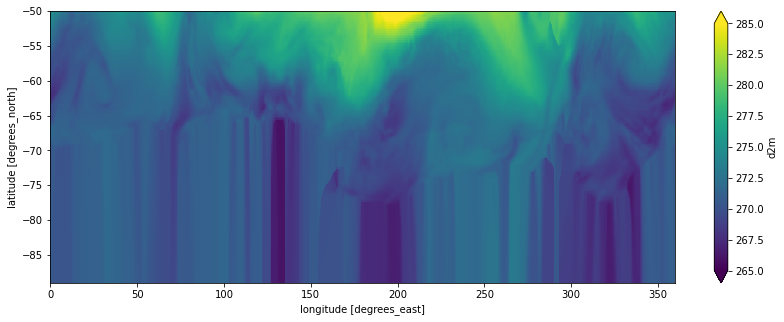

In [25]:
dsERA.isel(time=(dsERA.time.dt.day==1)).d2m.mean(dim='time').plot(ylim=(-89, -50), figsize=(14,5), vmin=265, vmax=285)

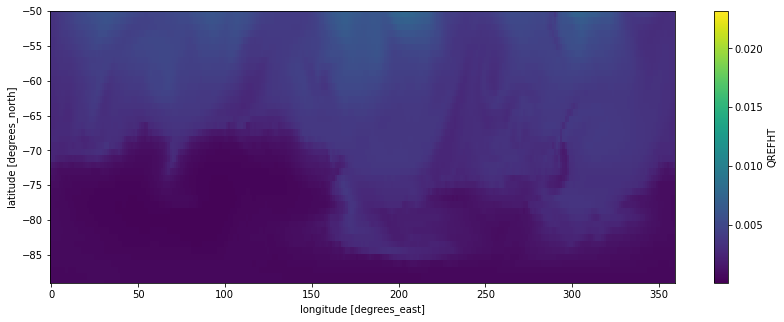

In [29]:
ds.QREFHT.isel(time=(ds.time.dt.year==1979)*(ds.time.dt.month==1)*(ds.time.dt.day==1)).mean(dim='time').plot(ylim=(-89, -50), figsize=(14,5))

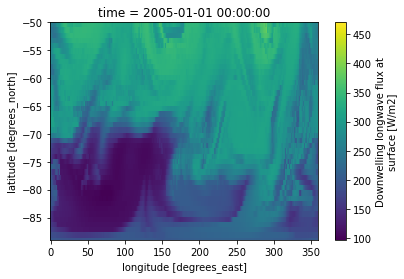

In [19]:
ds.FLDS.isel(time=365*5).plot(ylim=(-89, -50))